In [5]:
%matplotlib inline

import pandas as pd
import os.path as op
import os
from collections import Counter

from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


def rarefaction(valuelist, n=None, color='b', plot=True):
    import random
    
    if n == None or n > len(valuelist):
        n = len(valuelist)

    clusts = random.sample(valuelist, n)
    samples = 0
    clusters = 0

    sampled_clusters = set()
    data = []

    for c in clusts:
        samples += 1
        if c in sampled_clusters:
            continue
        else:
            clusters += 1
            sampled_clusters.add(c)
    
        data.append((samples, clusters))
    
    pdf = pd.DataFrame(data, columns=["x","y"])
    if plot:
        #return plt.scatter(pdf['x'],pdf['y'], color = color)
        return plt.plot(pdf['x'],pdf['y'], linestyle='-', linewidth=3, color = color)
    else:
        return pdf

wd = '/mnt/scgc/simon/simonsproject/gorg-clustering'
os.chdir(wd)

In [6]:
color_list = ["#a95f24",
"#6b7be8",
"#9cba31",
"#9b4ec2",
"#5ec75a",
"#d044ab",
"#459b38",
"#5753c0",
"#c6ae31",
"#d07ce1",
"#3c752a",
"#d6347c",
"#53c896",
"#da3956",
"#45c1c1",
"#d85328",
"#4cacdb",
"#dd9330",
"#4168a7",
"#7d9939",
"#9e418a",
"#85bb76",
"#e66ca7",
"#469057",
"#745ea6",
"#91842c",
"#7097dd",
"#5c6918",
"#b297e1",
"#bdbb6c",
"#a8679f",
"#306a3c",
"#b13a33",
"#41a183",
"#a63f5d",
"#277257",
"#e57557",
"#56642b",
"#de91be",
"#829055",
"#8b4368",
"#c99f51",
"#d56474",
"#87672d",
"#e18887",
"#95505b",
"#de9c6f",
"#a05940"]

In [12]:
## original mmseqs2 output
tsv_file = 'analyses/gorg_sag_orfs_80minid_m80.tsv'

df = pd.read_csv(tsv_file, sep="\t", names = ['cluster','orf'])
df['sag'] = [i.split(".")[0].split("_")[0] for i in df['orf']]

# SAG groups as defined in table XXX
groups = pd.read_excel('/mnt/scgc/simon/simonsproject/info/GORG_16S_basicinfo_20190123.xlsx')
groups.rename(columns={"SAG":'sag'}, inplace=True)

# merge tables
df = df.merge(groups[['sag','Group_short']], on='sag', how='left')
df.rename(columns={'Group_short':'Group'}, inplace=True)

Plot rarefaction/accumulation curves by group

(0, 120000.0)

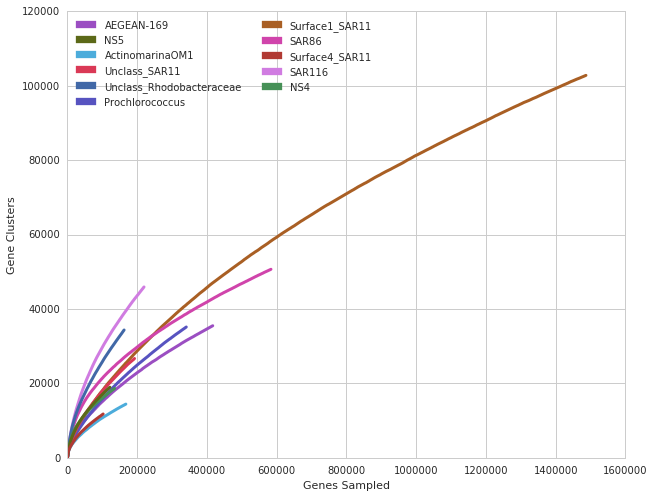

In [14]:
sns.set_style('whitegrid')

n = 100000

gdict = {}

plt.figure(figsize=(10,8))

for i, group in enumerate(df['Group'].unique()):

    subdf = df[df['Group'] == group]
    if group == "Unidentified" or group == "Other" or len(subdf) < n:
        continue
    else:
        gdict[group] = color_list[i]
        plot = rarefaction(list(subdf['cluster']), n=None, color=color_list[i])

legend_elements = [Patch(facecolor=gdict[i], edgecolor=gdict[i], label=i) for i in gdict]
plt.legend(handles=legend_elements, loc=0,
          fancybox=False, shadow=False, frameon=False, ncol=2)

plt.xlabel('Genes Sampled')
plt.ylabel('Gene Clusters')
plt.xlim(0,)
plt.ylim(0,)